In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from Ising import Lattice

In [2]:
[Ms, Chis, Cs] = np.load('data/higher_dims2.npz')['stats_d'][2]
[M_errs, Chi_errs, C_errs] = np.load('data/higher_dims2.npz')['errs_d'][2]
print(Ms)

[0.50330551 0.49096152 0.47725553 0.46418162 0.44830176 0.43258803
 0.41680914 0.39848921 0.38013717 0.36023628 0.33974537 0.31580567
 0.28925342 0.25804614 0.22545342 0.17952537 0.10532753 0.06891804
 0.03977479 0.02702528]


In [3]:
def power_sing(T, alpha, a):
    return T ** alpha * a

def lin_fit(T, alpha, a):
    return T * alpha + a

def M_exp(T, T_c, beta, a):
    return a * (np.abs(T_c - T) ** (beta)) * (T < T_c)

In [4]:
K = 10
n = 200
ds = [3, 4, 5]
N = 10
T_steps = 20

Ts = np.linspace(8.2, 8.85, T_steps)

# Susceptibility

[-1.05800666  0.38122212]
0.041782870742616975


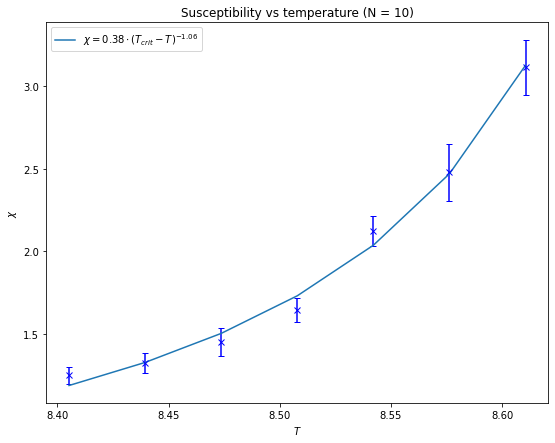

In [8]:
max = np.argmax(Chis)
T_c = Ts[max]
s = slice(6, max-3)
T_range = np.abs(Ts[s] - T_c)
Chi_range = Chis[s]
Chi_err_range = Chi_errs[s]/4

bounds_gamma = ([-3, -5], [0, 20])
fit, fit_err = curve_fit(power_sing, T_range, Chi_range, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(-T_range+T_c, Chi_range, Chi_err_range, capsize=3, fmt='bx')
Chi_pred = power_sing(T_range, gamma, a)
ax.plot(-T_range+T_c, Chi_pred)

ax.set_title("Susceptibility vs temperature ("+ f'{N = }' + ")" )
ax.set_xlabel("$T$")
ax.set_ylabel("$\chi$")
fig.set_size_inches(9, 7)

ax.legend(["$\chi = 0.38\cdot(T_{crit} - T)^{-1.06}$"])
plt.savefig(r"Pics/gamma5d.png", format="png", dpi=1200, bbox_inches='tight')

# Specific heat

[-0.0711505   1.38060745]
0.0375651379373542


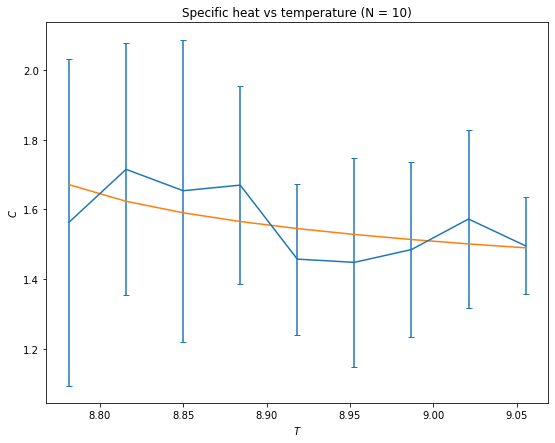

In [27]:
max = np.argmax(Cs)
T_c = Ts[max]
s = slice(5, max-1)
T_range = np.abs(Ts[s] - T_c)
C_range = Cs[s]
C_err_range = C_errs[s]

bounds_gamma = ([-0.5, -5], [0.5, 20])
fit, fit_err = curve_fit(power_sing, T_range, C_range, bounds=bounds_gamma, sigma=C_err_range)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_range+T_c, C_range, C_err_range, capsize=3)
C_pred = power_sing(T_range, gamma, a)
ax.plot(T_range+T_c, C_pred)

ax.set_title("Specific heat vs temperature ("+ f'{N = }' + ")")
ax.set_xlabel("$T$")
ax.set_ylabel("$C$")
fig.set_size_inches(9, 7)

[-0.05412499  0.3744071 ]
0.038773436752479545


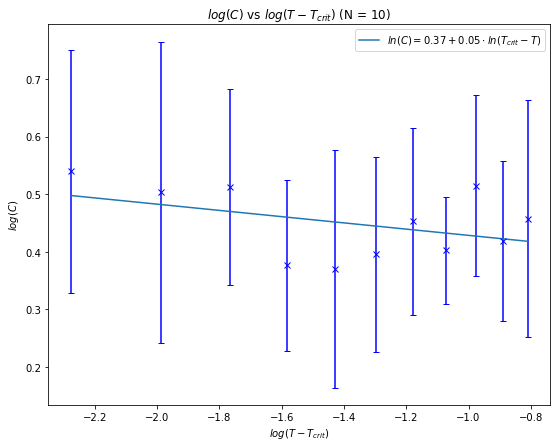

In [10]:
max = np.argmax(Cs)
T_c = Ts[max]
s = slice(2, max-2)
T_range = np.abs(Ts[s] - T_c)
T_log = np.log(T_range)
C_log = np.log(Cs[s])
C_log_err = C_errs[s]/Cs[s]

bounds_gamma = ([-0.5, -5], [0.5, 20])
fit, fit_err = curve_fit(lin_fit, T_log, C_log, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))

[gamma, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_log, C_log, C_log_err, capsize=3, fmt='bx')
C_pred = lin_fit(T_log, gamma, a)
ax.plot(T_log, C_pred)

ax.set_title("$log(C)$ vs $log(T-T_{crit})$ ("+ f'{N = }' + ")")
ax.set_xlabel("$log(T - T_{crit})$")
ax.set_ylabel("$log(C)$")
fig.set_size_inches(9, 7)
ax.legend(["$ln(C) = 0.37 + 0.05\cdot ln(T_{crit} - T)$"])
plt.savefig(r"Pics/alpha5d.png", format="png", dpi=1200, bbox_inches='tight')

# Magnetisation

[8.76466669 0.43038684 0.64684767]
0.005169898167701091
0.013280539982058755


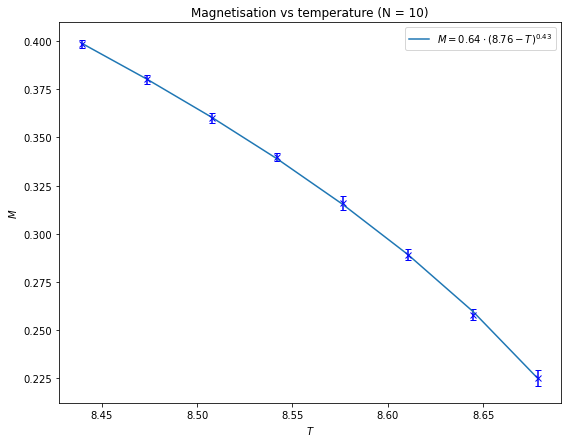

In [17]:
s = slice(7, -5)
T_range = Ts[s]
M_range = Ms[s]
M_err_range = M_errs[s]

bounds_gamma = ([8, 0, 0], [9, 1, 10])
fit, fit_err = curve_fit(M_exp, T_range, M_range, bounds=bounds_gamma)

print(fit)
print(np.sqrt(fit_err[0][0]))
print(np.sqrt(fit_err[1][1]))

[T_c, beta, a] = fit
fig, ax = plt.subplots()
ax.errorbar(T_range, M_range, M_err_range, capsize=3, fmt='bx')
M_pred = M_exp(T_range, T_c, beta, a)
ax.plot(T_range, M_pred)

ax.set_title("Magnetisation vs temperature ("+ f'{N = }' + ")")
ax.set_xlabel("$T$")
ax.set_ylabel("$M$")
fig.set_size_inches(9, 7)

ax.legend(["$M = 0.64\cdot(8.76 - T)^{0.43}$"])
plt.savefig(r"Pics/beta5d.png", format="png", dpi=1200, bbox_inches='tight')

# Critical Isotherm

In [9]:
K = 15
n = 300
H_min = 0.005
H_max = 0.3
H_steps = 20
Hs = np.geomspace(H_min, H_max, H_steps)
T_c = 8.76

bounds_alpha0 = ([2.26, 1, -10, -10], [2.4, 2, 10, 10])
bounds_alpha = ([0, 0], [0.6, 10])

l = Lattice(10, K=K, d=5)
Ms_0, M_errs_0 = [], []
for H in Hs:
    stat, err = l.stats(n, T_c, H=H, t0=100)
    Ms_0.append(stat[0]), M_errs_0.append(err[0])
[alpha, _], err = curve_fit(power_sing, Hs, Ms_0, bounds=bounds_alpha, sigma=M_errs_0)
alpha_err = np.sqrt(err[0,0])

print("alpha = " + str(alpha) + " +/- " + str(alpha_err))
print("delta = " + str(1/alpha) + " +/- " + str(alpha_err/alpha**2))

alpha = 0.27452874322795906 +/- 0.0006942833831982878
delta = 3.642605827870035 +/- 0.009212152680608071


a = 0.7256295841460682 +/- 0.0034826298829034865
alpha = 0.2774942911955036 +/- 0.001340419271005549
delta = 3.603677739429486 +/- 0.017407345814627218


MemoryError: In RendererAgg: Out of memory

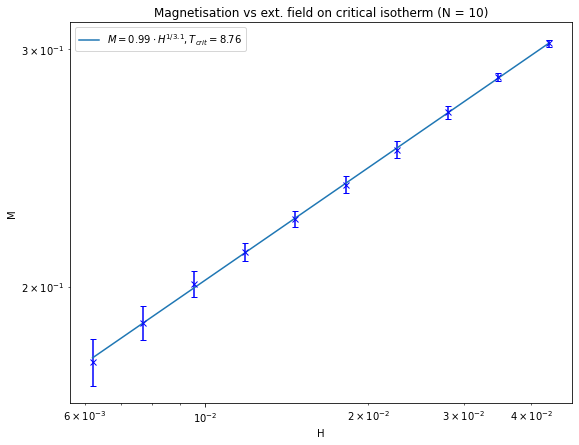

In [10]:
s = slice(1, -9)
H_range=Hs[s]
Ms=Ms_0[s]
M_errs=M_errs_0[s]


bounds_alpha = ([0, 0], [0.6, 10])
[alpha, a], err = curve_fit(power_sing, H_range, Ms, bounds=bounds_alpha, sigma=M_errs)
alpha_err = np.sqrt(err[0,0])
a_err = np.sqrt(err[1,1])

print(f'{a = } +/- {a_err}')
print("alpha = " + str(alpha) + " +/- " + str(alpha_err))
print("delta = " + str(1/alpha) + " +/- " + str(alpha_err/alpha**2))

fig, ax = plt.subplots()
ax.errorbar(H_range, Ms, M_errs, capsize=3, fmt="bx")
ax.plot(H_range, power_sing(H_range, alpha, a))
ax.set_title("Magnetisation vs ext. field on critical isotherm (N = 10)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("H")
ax.set_ylabel("M")

ax.legend(["$M = 0.99\cdot H^{1/3.1},  T_{crit} = 8.76$"])
fig.set_size_inches(9, 7)
plt.savefig(r"Pics/delta5d.png", format="png", dpi=1200, bbox_inches='tight')